In [1]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import imageio

### Define and test convolution and cross-correlation operators

In [2]:
def convolution(image, kernel, padding=1):
    # get shapes and sizes
    m,n = image.shape
    assert(kernel.shape[0]==kernel.shape[1]) # square kernel
    k = int((kernel.shape[0]-1)/2)
    
    kernel_sum = np.sum(kernel)
    if(kernel_sum <= 0):
        kernel_sum = 1
    
    # apply padding to image
    for i in range(padding):
        image = np.vstack((np.zeros((1,n)), image, np.zeros((1,n))))
    for i in range(padding):
        image = np.hstack((np.zeros((m+2*padding,1)), image, np.zeros((m+2*padding,1))))
        
    # initialize output image
    G = np.zeros(image.shape)
    
    # apply kernel
    for i in range(0,m+1):
        for j in range(0,n+1):
            val = 0
            for u in range(-k,k+1):
                for v in range(-k,k+1):
                    val += (kernel[1-u,1-v]*image[i-u, j-v])
            G[i,j] = val/kernel_sum
            
    # remove padding
    G = G[padding:m+padding,padding:n+padding]
    
    return G

def cross_correlation(image, kernel, padding=1):
    # get shapes and sizes
    m,n = image.shape
    k = int((kernel.shape[0]-1)/2)
    
    kernel_sum = np.sum(kernel)
    if(kernel_sum <= 0):
        kernel_sum = 1
    
    # apply padding to image
    for i in range(padding):
        image = np.vstack((np.zeros((1,n)), image, np.zeros((1,n))))
    for i in range(padding):
        image = np.hstack((np.zeros((m+2*padding,1)), image, np.zeros((m+2*padding,1))))
        
    # initialize output image
    G = np.zeros(image.shape)
    
    # apply kernel
    for i in range(0,m+1):
        for j in range(0,n+1):
            # print("i and j: ", i, ", ", j)
            val = 0
            for u in range(-k,k+1):
                for v in range(-k,k+1):
                    # print("u and v: ", u, ", ", v)
                    try:
                        val += (kernel[1-u,1-v]*image[i+u, j+v])
                    except:
                        val += 0
            G[i,j] = val/kernel_sum
            
    # remove padding
    G = G[padding:m+padding,padding:n+padding]
    
    return G

0.0


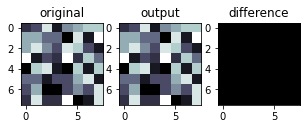

In [3]:
# test convolution with identity kernel on smaller random image
image2 = np.random.randint(0,10,size=(8,8))
identity = np.asarray([[0,0,0],[0,1,0],[0,0,0]])
image2_prime = convolution(image2, identity)
print(np.linalg.norm(image2-image2_prime))

fig=plt.figure(figsize=(5, 15))
plt.subplot(1,3,1)
plt.imshow(image2, cmap=plt.cm.bone)
plt.title("original")
plt.subplot(1,3,2)
plt.imshow(image2_prime, cmap=plt.cm.bone)
plt.title("output")
plt.subplot(1,3,3)
plt.imshow(image2-image2_prime, cmap=plt.cm.bone)
plt.title("difference")
plt.show()

0.0


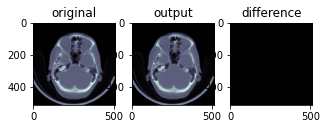

In [4]:
# test convolution with identity kernel
dcm = pydicom.dcmread('./ID_0002a616e.dcm')
image = dcm.pixel_array
identity = np.asarray([[0,0,0],[0,1,0],[0,0,0]])
image_prime = convolution(image, identity)
print(np.linalg.norm(image-image_prime))

fig=plt.figure(figsize=(5, 15))
plt.subplot(1,3,1)
plt.imshow(image, cmap=plt.cm.bone)
plt.title("original")
plt.subplot(1,3,2)
plt.imshow(image_prime, cmap=plt.cm.bone)
plt.title("output")
plt.subplot(1,3,3)
plt.imshow(image-image_prime, cmap=plt.cm.bone)
plt.title("difference")
plt.show()

0.0


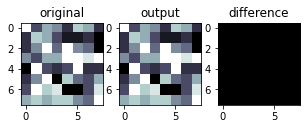

In [5]:
# test cross-correlation with identity kernel on smaller random image
image2 = np.random.randint(0,10,size=(8,8))
identity = np.asarray([[0,0,0],[0,1,0],[0,0,0]])
image2_prime = cross_correlation(image2, identity)
print(np.linalg.norm(image2-image2_prime))

fig=plt.figure(figsize=(5, 15))
plt.subplot(1,3,1)
plt.imshow(image2, cmap=plt.cm.bone)
plt.title("original")
plt.subplot(1,3,2)
plt.imshow(image2_prime, cmap=plt.cm.bone)
plt.title("output")
plt.subplot(1,3,3)
plt.imshow(image2-image2_prime, cmap=plt.cm.bone)
plt.title("difference")
plt.show()

0.0


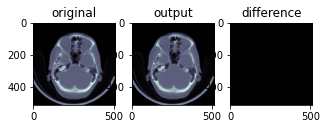

In [6]:
# test cross-correlation with identity kernel
identity = np.asarray([[0,0,0],[0,1,0],[0,0,0]])
image_prime = cross_correlation(image, identity)
print(np.linalg.norm(image-image_prime))

fig=plt.figure(figsize=(5, 15))
plt.subplot(1,3,1)
plt.imshow(image, cmap=plt.cm.bone)
plt.title("original")
plt.subplot(1,3,2)
plt.imshow(image_prime, cmap=plt.cm.bone)
plt.title("output")
plt.subplot(1,3,3)
plt.imshow(image-image_prime, cmap=plt.cm.bone)
plt.title("difference")
plt.show()

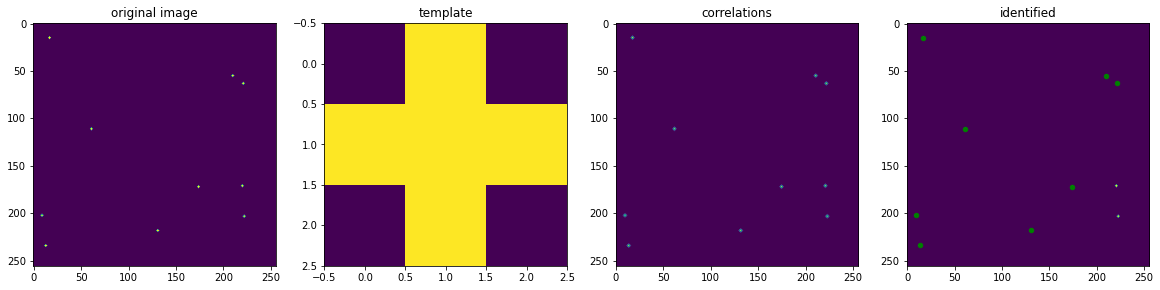

In [7]:
# test cross-correlation with template

n=256

im = np.zeros((n,n))
idx_x = np.random.randint(1,n-2,10)
idx_y = np.random.randint(1,n-2,10)

for i in range(10):
    x = idx_x[i]
    y = idx_y[i]
    im[x,y] = 1
    im[x+1,y] = 1
    im[x, y+1] = 1
    im[x,y-1] = 1
    im[x-1, y] = 1
    
plus = np.asarray([[0,1,0],[1,1,1],[0,1,0]])

im_prime = cross_correlation(im, plus)

plus_found = []

plus_found_final =[]

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        if(im_prime[i,j] != 0):
            plus_found.append({'x':i, 'y':j, 'val':im_prime[i,j]})
            
def is_neighbor(p1,p2):
    return abs(p1['x']-p2['x']+1)<2 or abs(p1['x']-p2['x']-1)<2 or abs(p1['y']-p2['y']+1)<2 or abs(p1['y']-p2['y']-1)<2

sort = sorted(plus_found, key=lambda p: p['val'], reverse=True)
for p in sort:
    neighbor_found = False
    for p_final in plus_found_final:
        if is_neighbor(p, p_final):
            neighbor_found = True
            break
    if not neighbor_found:
        plus_found_final.append(p)

    
plt.figure(figsize=(20,15))
plt.subplot(1,4,1)
plt.imshow(im)
plt.title("original image")
plt.subplot(1,4,2)
plt.imshow(plus)
plt.title("template")
plt.subplot(1,4,3)
plt.imshow(im_prime)
plt.title("correlations")
plt.subplot(1,4,4)
plt.imshow(im)
for p in plus_found_final:
    plt.scatter(p['y'], p['x'], c='g', s=20)
plt.title("identified")
plt.show()

### 1. Read dicom image and sharpen via linear filter

In [8]:
dcm = pydicom.dcmread('./ID_0002a616e.dcm')
image = dcm.pixel_array

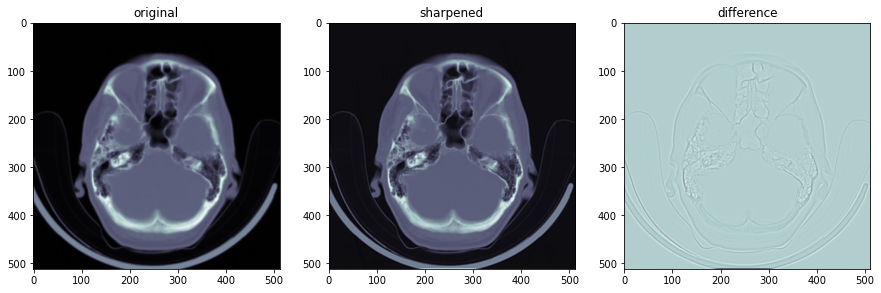

In [9]:
# sharpening
kernel = np.asarray([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_prime = convolution(image, kernel)

fig=plt.figure(figsize=(15, 25))
plt.subplot(1,3,1)
plt.imshow(image, cmap=plt.cm.bone)
plt.title("original")
plt.subplot(1,3,2)
plt.imshow(image_prime, cmap=plt.cm.bone)
plt.title("sharpened")
plt.subplot(1,3,3)
plt.imshow(image-image_prime, cmap=plt.cm.bone)
plt.title("difference")
plt.show()

### 2. Find denticles in original image via template

In [10]:
image = imageio.imread('denticles.png', as_gray=True)
template = imageio.imread('template.png', as_gray=True)
template = template[14:] # make square

In [11]:
# find examples of template
from skimage.transform import resize
from skimage.transform import rotate

image_prime = cross_correlation(image, resize(template,(7,7)))

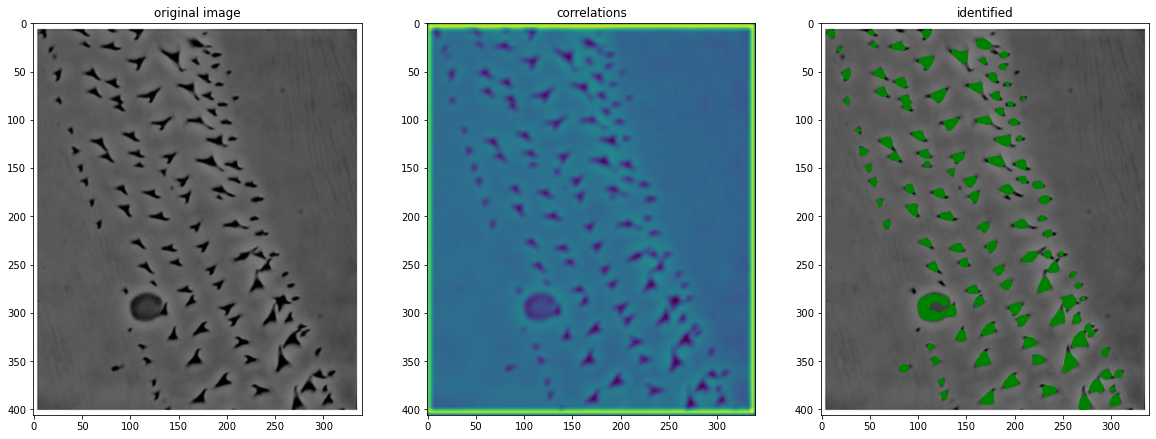

In [12]:
# identify positive correlations

res = (image_prime - np.min(image_prime)) / (np.max(image_prime) - np.min(image_prime))

denticle_found = []
denticle_found_final =[]

thresh = 0.2

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if(res[i,j] < thresh):
            denticle_found.append({'x':i, 'y':j, 'val':res[i,j]})
            
def is_neighbor(p1,p2):
    return False
    # return abs(p1['x']-p2['x']+1)<2 or abs(p1['x']-p2['x']-1)<2 or abs(p1['y']-p2['y']+1)<2 or abs(p1['y']-p2['y']-1)<2

sort = sorted(denticle_found, key=lambda d: d['val'], reverse=True)
for d in sort:
    neighbor_found = False
    for d_final in denticle_found_final:
        if is_neighbor(d, d_final):
            neighbor_found = True
            break
    if not neighbor_found:
        denticle_found_final.append(d)

    
plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("original image")
plt.subplot(1,3,2)
plt.imshow(image_prime)
plt.title("correlations")
plt.subplot(1,3,3)
plt.imshow(image, cmap='gray')
for p in denticle_found_final:
    plt.scatter(p['y'], p['x'], c='g', s=10)
plt.title("identified")
plt.show()

### 3. Edge detection over dicom image via convolution

In [13]:
dcm = pydicom.dcmread('./ID_0002a616e.dcm')
image = dcm.pixel_array

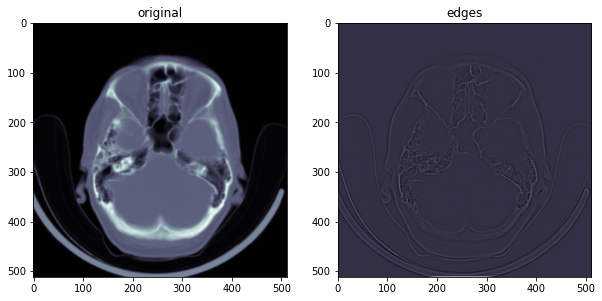

In [14]:
# edge detection
kernel = np.asarray([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
image_prime = convolution(image, kernel)

fig=plt.figure(figsize=(10, 15))
plt.subplot(1,2,1)
plt.imshow(image, cmap=plt.cm.bone)
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(image_prime, cmap=plt.cm.bone)
plt.title("edges")
plt.show()